# **Importing libraries and data** 



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
from google.colab import files

import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix,classification_report
from sklearn.inspection import permutation_importance
sklearn.set_config(print_changed_only=True)

import warnings
warnings.filterwarnings('ignore')


In [ ]:
print(os.listdir())

['.config', 'Stroke_prediction_final.csv', 'sample_data']


In [ ]:
df=pd.read_csv("Stroke_prediction_final.csv")

# **Data Cleaning**

---



In [ ]:
data_row_count, data_column_count = df.shape
print('Row Count:', data_row_count)
print('Column Count:', data_column_count)

Row Count: 5644
Column Count: 12


Checking for Null Values in the Dataset.

---



In [ ]:
print(df.isnull().any())

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status        True
stroke               False
dtype: bool


In [ ]:
#Handling the Null values--Only N/A values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  301
smoking_status        98
stroke                 0
dtype: int64

In [ ]:
missing_value=["N/a","na",np.nan]
df=pd.read_csv("Stroke_prediction_final.csv",na_values=missing_value)

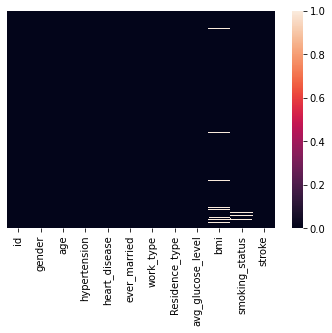

In [ ]:
#HeatMap
sns.heatmap(df.isnull(),yticklabels=False) 

In [ ]:
#Adding a String Value-'Unknown' for Null values in Smoking_status.
df['smoking_status'].fillna('Unknown', inplace=True)
df.tail(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5639,25110,Female,56.0,0,0,Yes,Private,Rural,83.27,32.90000,smokes,1
5640,5392,Male,69.0,0,0,Yes,Self-employed,Rural,97.36,28.00000,Unknown,1
5641,35057,Female,80.0,0,0,Yes,Self-employed,Urban,75.91,26.70000,never smoked,1
5642,64109,Male,62.0,1,1,Yes,Private,Rural,77.97,31.50000,formerly smoked,1
5643,10463,Female,76.0,0,0,No,Private,Rural,100.55,28.94883,never smoked,1


In [ ]:
print("---------------BMI  has NaN values that needs to be cleaned.---------------")
print(df['bmi'].head(5))


print()

print("---------------Using Imputation, we add mean values in NaN.---------------")
#Imputation:
df['bmi'].fillna(df['bmi'].mean(), inplace=True)
df['bmi'].head(5)

---------------BMI  has NaN values that needs to be cleaned.---------------
0    36.60000
1    28.94883
2    32.50000
3    34.40000
4    24.00000
Name: bmi, dtype: float64

---------------Using Imputation, we add mean values in NaN.---------------


0    36.60000
1    28.94883
2    32.50000
3    34.40000
4    24.00000
Name: bmi, dtype: float64

In [ ]:
#Checking if the data has Null Values
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

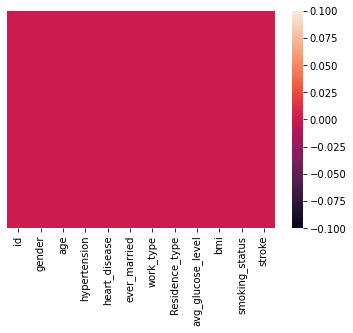

In [ ]:
#HeatMap
sns.heatmap(df.isnull(),yticklabels=False) 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5644 non-null   int64  
 1   gender             5644 non-null   object 
 2   age                5644 non-null   float64
 3   hypertension       5644 non-null   int64  
 4   heart_disease      5644 non-null   int64  
 5   ever_married       5644 non-null   object 
 6   work_type          5644 non-null   object 
 7   Residence_type     5644 non-null   object 
 8   avg_glucose_level  5644 non-null   float64
 9   bmi                5644 non-null   float64
 10  smoking_status     5644 non-null   object 
 11  stroke             5644 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 529.2+ KB


In [ ]:
df['gender'] = df['gender'].replace('Other', list(df.gender.mode().values)[0])
df.gender.value_counts()

Female    3285
Male      2359
Name: gender, dtype: int64

## **Exploratory Data Analysis**


Categorical Feature Analysis

---



IndexError: ignored

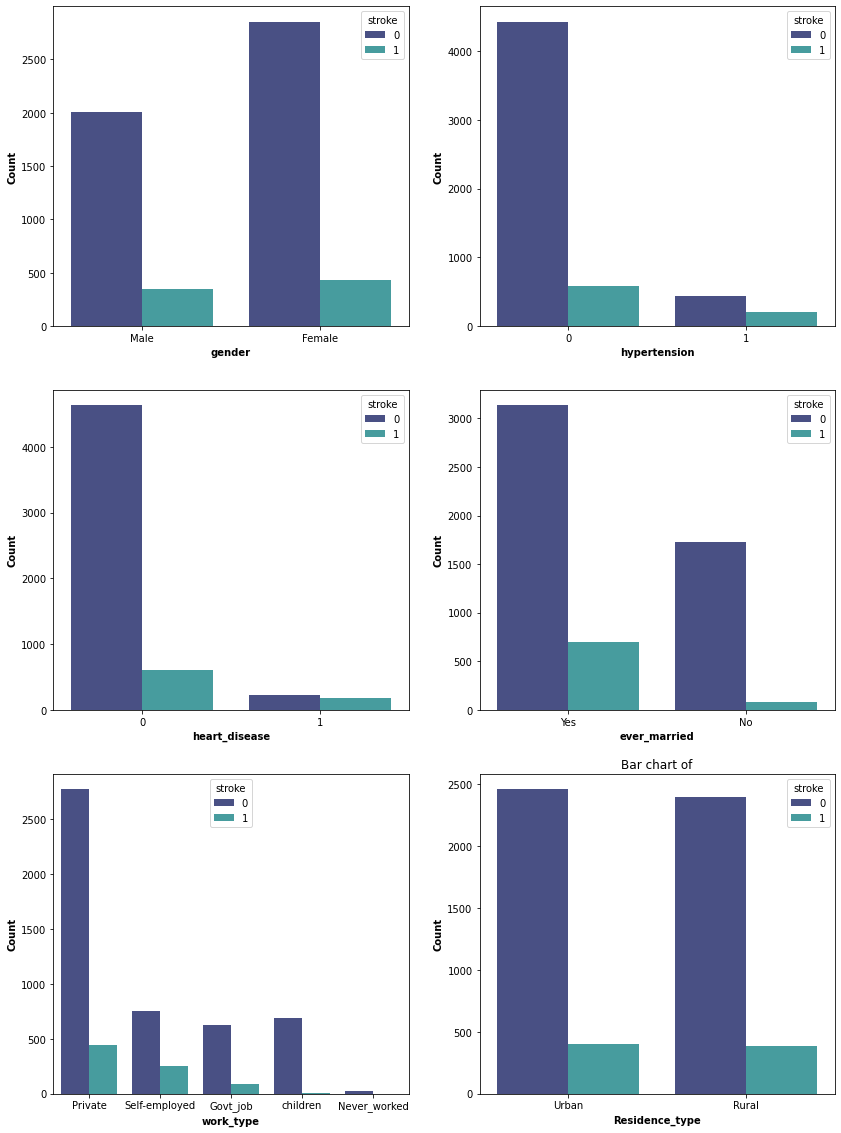

In [ ]:
#EDA
df_cat = ['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status', 'stroke']

fig, axs = plt.subplots(3, 2, figsize=(14,20))
axs = axs.flatten()

# iterate through each column of df_catd and plot
for i, col_name in enumerate(df_cat):
    sns.countplot(x=col_name, data=df, ax=axs[i], hue =df['stroke'], palette = "mako")
    plt.title("Bar chart of")
    axs[i].set_xlabel(f"{col_name}", weight = 'bold')
    axs[i].set_ylabel('Count', weight='bold')


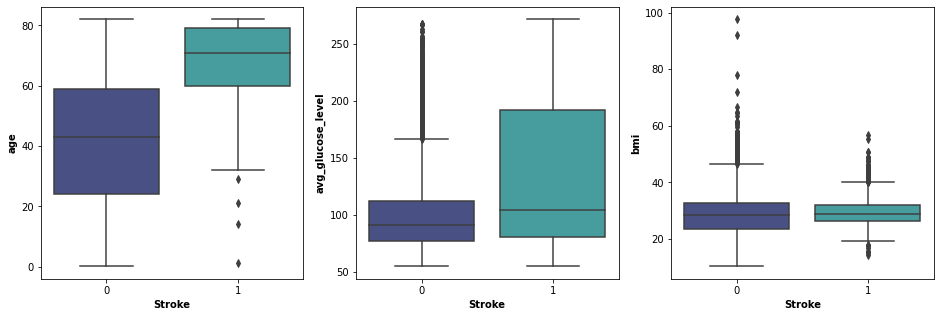

In [ ]:
#Numerical Feature Analysis

df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=df, ax=axs[i],  palette = 'mako')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

In [ ]:
bmi_outliers=df.loc[df['bmi']>50]
bmi_outliers['bmi'].shape
(79,)

(79,)

In [ ]:
df["bmi"] = pd.to_numeric(df["bmi"])
df["bmi"] = df["bmi"].apply(lambda x: 50 if x>50 else x)

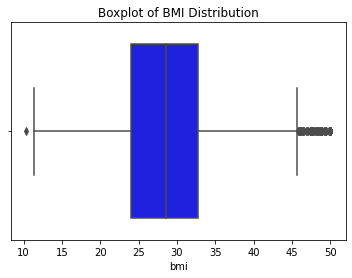

In [ ]:
sns.boxplot(data=df,x=df["bmi"],color='blue')
plt.title("Boxplot of BMI Distribution");

In [ ]:
#Numerical Feature Analysis

df_num = ['age', 'avg_glucose_level', 'bmi']

fig, axs = plt.subplots(1, 3, figsize=(16,5))
axs = axs.flatten()

# iterate through each column in df_num and plot
for i, col_name in enumerate(df_num):
    sns.boxplot(x="stroke", y=col_name, data=df, ax=axs[i],  palette = 'mako')
    axs[i].set_xlabel("Stroke", weight = 'bold')
    axs[i].set_ylabel(f"{col_name}", weight='bold')

# **ENCODING**

Ordinal Encoding

---



In [ ]:
#Ordinal Encoding
df['gender'] = df.gender.astype("category").cat.codes
df['ever_married'] = df.ever_married.astype("category").cat.codes
df['Residence_type'] = df.Residence_type.astype("category").cat.codes
df['work_type'] = df.ever_married.astype("category").cat.codes
df['smoking_status'] = df.Residence_type.astype("category").cat.codes

df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,1,1,228.69,36.60000,1,1
1,51676,0,61.0,0,0,1,1,0,202.21,28.94883,0,1
2,31112,1,80.0,0,1,1,1,0,105.92,32.50000,0,1
3,60182,0,49.0,0,0,1,1,1,171.23,34.40000,1,1
4,1665,0,79.0,1,0,1,1,0,174.12,24.00000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5639,25110,0,56.0,0,0,1,1,0,83.27,32.90000,0,1
5640,5392,1,69.0,0,0,1,1,0,97.36,28.00000,0,1
5641,35057,0,80.0,0,0,1,1,1,75.91,26.70000,1,1
5642,64109,1,62.0,1,1,1,1,0,77.97,31.50000,0,1


One-Hot Encoding

---



In [ ]:
#One-Hot Encoding
df = pd.get_dummies(df, columns = [ 'work_type','smoking_status','ever_married','Residence_type','gender'])


In [ ]:
df.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes',
       'ever_married_No', 'ever_married_Yes', 'Residence_type_Rural',
       'Residence_type_Urban', 'gender_Female', 'gender_Male'],
      dtype='object')

In [ ]:
df=df.drop(columns=['id','work_type_children','smoking_status_smokes','ever_married_Yes','Residence_type_Urban','gender_Male','Residence_type_Rural'])

In [ ]:
df.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'work_type_Govt_job', 'work_type_Never_worked',
       'work_type_Private', 'work_type_Self-employed',
       'smoking_status_Unknown', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'ever_married_No', 'gender_Female'],
      dtype='object')

CLEANED & PROCESSING DATA

---



In [ ]:
newdf = df.to_csv('newCleaned.csv')
newdf

In [ ]:
df

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,ever_married_No,ever_married_Yes,Residence_type_Rural,Residence_type_Urban,gender_Female,gender_Male
0,9046,67.0,0,1,228.69,36.60000,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,1
1,51676,61.0,0,0,202.21,28.94883,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0
2,31112,80.0,0,1,105.92,32.50000,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1
3,60182,49.0,0,0,171.23,34.40000,1,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0
4,1665,79.0,1,0,174.12,24.00000,1,0,0,0,1,0,0,0,1,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,25110,56.0,0,0,83.27,32.90000,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0
5640,5392,69.0,0,0,97.36,28.00000,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1
5641,35057,80.0,0,0,75.91,26.70000,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0
5642,64109,62.0,1,1,77.97,31.50000,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1


In [ ]:
#Cleaned Dataset
#df.to_csv('newCleaned.csv')
#files.download('newCleaned.csv')


# **MULTICOLLINEARITY ANALYSIS**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


df_en = df
df_en.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,ever_married_No,gender_Female
0,67.0,0,1,228.69,36.60000,1,0,0,1,0,0,1,0,0,0
1,61.0,0,0,202.21,28.94883,1,0,0,0,1,0,0,1,0,1
2,80.0,0,1,105.92,32.50000,1,0,0,1,0,0,0,1,0,0
3,49.0,0,0,171.23,34.40000,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,24.00000,1,0,0,0,1,0,0,1,0,1


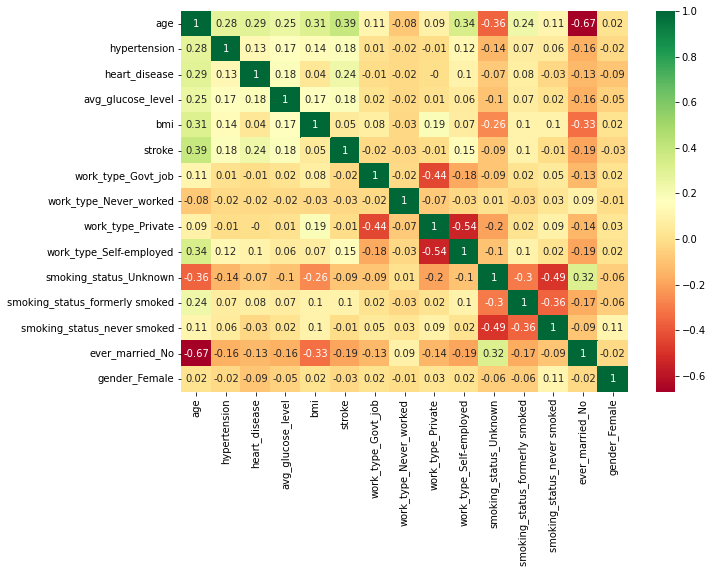

In [ ]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');

In [ ]:
df.info()

In [ ]:
#df_en = df_en.drop(['ever_married_Yes'], axis = 1)
df_en = df_en.drop(['ever_married_No'], axis = 1)
#df_en = df_en.drop(['Residence_type_Rural'], axis = 1)
#df_en = df_en.drop(['Residence_type_Urban'], axis = 1)
#df_en = df_en.drop(['gender_Female'], axis = 1)
#df_en = df_en.drop(['work_type_children'], axis = 1)
df_en = df_en.drop(['work_type_Self-employed'], axis = 1)

df_en.head(3)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,gender_Female
0,67.0,0,1,228.69,36.60000,1,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.94883,1,0,0,0,0,0,1,1
2,80.0,0,1,105.92,32.50000,1,0,0,1,0,0,1,0


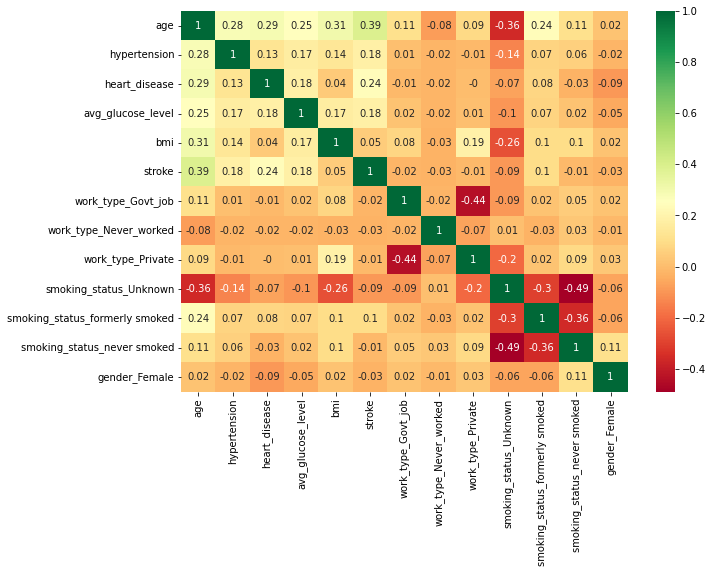

In [ ]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');

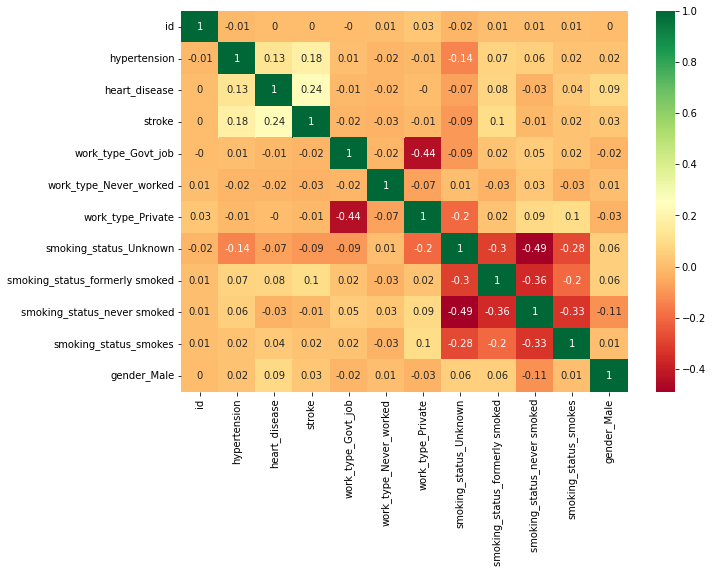

In [ ]:
corr = df_en.corr().round(2)
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot = True, cmap = 'RdYlGn');

Scaling

---



In [ ]:
df['age'].head(5)

0    67.0
1    61.0
2    80.0
3    49.0
4    79.0
Name: age, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
columns = ['avg_glucose_level','bmi','age']
stand_scaled = s.fit_transform(df_en[['avg_glucose_level','bmi','age']])
stand_scaled = pd.DataFrame(stand_scaled,columns=columns)

df_en=df_en.drop(columns=columns,axis=1)
stand_scaled.head()

,avg_glucose_level,bmi,age
0,2.554676,1.078355,0.928782
1,1.993077,0.012506,0.668347
2,-0.049082,0.507203,1.493060
3,1.336040,0.771884,0.147476
4,1.397332,-0.676892,1.449654


In [ ]:
df['age'].head(5)

0    0.928782
1    0.668347
2    1.493060
3    0.147476
4    1.449654
Name: age, dtype: float64

In [ ]:
df = pd.concat([df_en, stand_scaled], axis=1)
df.head(3)

,hypertension,heart_disease,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,Residence_type_Rural,gender_Female,avg_glucose_level,bmi,age
0,0,1,1,0,0,1,0,1,0,0,0,2.554676,1.015579e+00,0.928782
1,0,0,1,0,0,0,0,0,1,1,1,1.993077,9.431396e-16,0.668347
2,0,1,1,0,0,1,0,0,1,1,0,-0.049082,4.713649e-01,1.493060


In [ ]:
df

# **Modelling**

In [ ]:
X=df.copy()
Y=X['stroke']

X= X.drop(['stroke'], axis=1)



In [ ]:
X.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'work_type_Govt_job', 'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'smoking_status_Unknown',
       'smoking_status_formerly smoked', 'smoking_status_never smoked',
       'ever_married_No', 'gender_Female'],
      dtype='object')

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=0)

In [ ]:
X_train.shape

(4233, 13)

In [ ]:
X_test.shape

(1411, 13)

Logistic Regression

---



In [ ]:
from sklearn.linear_model import LogisticRegression
 
ml=LogisticRegression()
ml.fit(X_train, y_train)
print("Training-Score",ml.score(X_train, y_train))
print("Testing -Score",ml.score(X_test, y_test))

y_pred = ml.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
Acc=accuracy_score(y_test, y_pred) * 100
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
#print("Recall :", recall_score(y_test, y_pred, pos_label='stroke') * 100)
#print("Precision :", precision_score(y_test, y_pred, pos_label='stroke patients') * 100)




Training-Score 0.8603827072997874
Testing -Score 0.8618001417434443
Confusion Matrix:
[[1186   35]
 [ 160   30]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1221
           1       0.46      0.16      0.24       190

    accuracy                           0.86      1411
   macro avg       0.67      0.56      0.58      1411
weighted avg       0.82      0.86      0.83      1411

Accuracy : 86.18001417434444


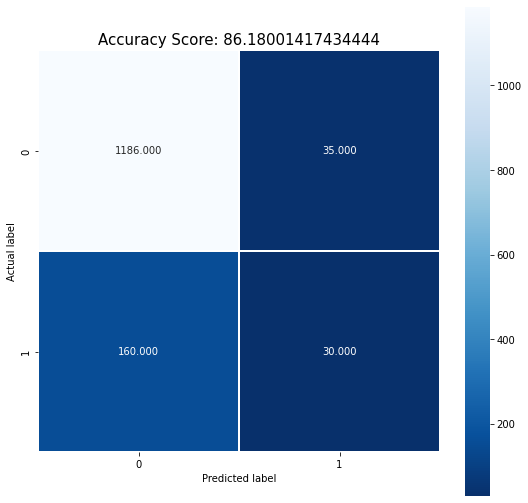

In [ ]:
kcm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(kcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Acc)
plt.title(all_sample_title, size = 15);

Random Forest

---



Training-Score 0.9997637609260571
Testing -Score 0.8561304039688165
Confusion Matrix:
[[1169   52]
 [ 151   39]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1221
           1       0.43      0.21      0.28       190

    accuracy                           0.86      1411
   macro avg       0.66      0.58      0.60      1411
weighted avg       0.82      0.86      0.83      1411

Accuracy : 85.61304039688164


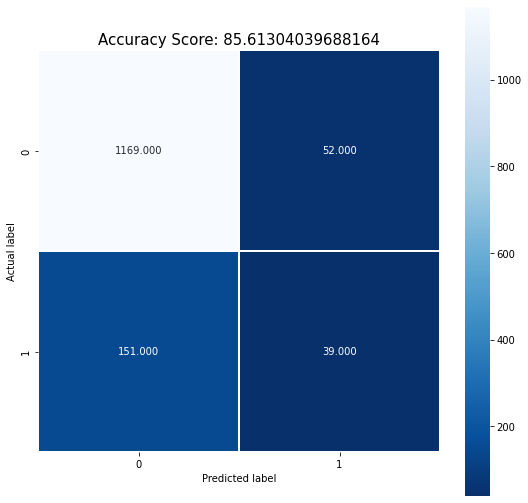

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print("Training-Score",rf.score(X_train,y_train))
print("Testing -Score",rf.score(X_test,y_test))
y_pred= rf.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
#print("Accuracy :", accuracy_score(y_test, y_pred) * 100)

print(classification_report(y_test,y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
Acc=accuracy_score(y_test, y_pred) * 100

kcm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(kcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Acc)
plt.title(all_sample_title, size = 15);

Training-Score 1.0
Testing -Score 0.8143160878809355
Confusion Matrix:
[[1082  139]
 [ 123   67]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89      1221
           1       0.33      0.35      0.34       190

    accuracy                           0.81      1411
   macro avg       0.61      0.62      0.62      1411
weighted avg       0.82      0.81      0.82      1411

Accuracy : 81.43160878809354


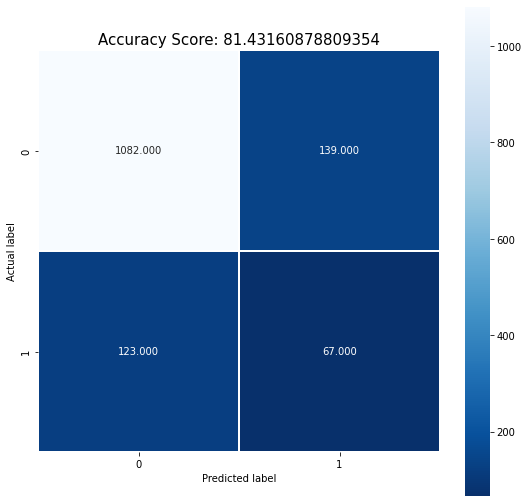

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print("Training-Score",dt.score(X_train,y_train))
print("Testing -Score",dt.score(X_test,y_test))

y_pred= dt.predict(X_test)
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
#print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
print(classification_report(y_test,y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)

Acc=accuracy_score(y_test, y_pred) * 100

kcm = confusion_matrix(y_test,y_pred)

plt.figure(figsize=(9,9))
sns.heatmap(kcm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(Acc)
plt.title(all_sample_title, size = 15);


In [ ]:
def plot_pie(column, title="All"):
  fig,axs = plt.subplots(1,1)
  data = df[column].value_counts()
  plt.pie(data,autopct= '%1.2f%%',labels=data.index)
  plt.title(title)
  plt.show()

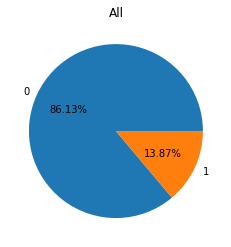

In [ ]:
plot_pie('stroke')

# **Cross-Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
ml=LogisticRegression()


scores = cross_val_score(ml, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

print("--------------------------------------------------")
print('Average cross-validation score: {:.4f}'.format(scores.mean()))


Cross-validation scores:[0.85377358 0.86556604 0.83962264 0.85815603 0.86761229 0.87706856
 0.8534279  0.85579196 0.85579196 0.86761229]
--------------------------------------------------
Average cross-validation score: 0.8594
